In [ ]:
import sctoolbox
from sctoolbox.utilities import bgcolor

# Velocity / Pseudotime Analysis

This notebook can be used for velocity and pseudotime analysis of scRNA and scATAC data.

### Velocity Analysis
XX Explanation velocity analysis XX

### Pseudotime Analysis
XX Explanation velocity analysis XX

## Setup

In [2]:
from sctoolbox import settings
import scvelo as scv
import scanpy as sc
import pandas as pd
import sctoolbox.utilities as utils

Unable to determine R home: [Errno 2] No such file or directory: 'R'


## Input 

In [3]:
# sctoolbox settings
settings.adata_input_dir = "../adatas/"
settings.adata_output_dir = "../adatas/"
scv.settings.figdir = '../figures/velocity/'
settings.log_file: "velocity_analysis_log.txt"
last_notebook_adata = "anndata_4.h5ad"

vdata_path = ""
threads = 4

clustering = "clusters" # clustering
embedding = "umap"
n_pcs = 10


goi = [] # Gene of interest


## Load anndata

In [4]:
adata = utils.load_h5ad("last_notebook_adata")
display(adata)

FileNotFoundError: [Errno 2] Unable to synchronously open file (unable to open file: name = '../adatas/last_notebook_adata', errno = 2, error message = 'No such file or directory', flags = 0, o_flags = 0)

In [5]:
# temp
adata = scv.datasets.pancreas()


## Check for spliced/unspliced/ambiguous layer

In [6]:
if set(adata.layers.keys()).issubset({"spliced", "unspliced", "ambiguous"}):
    # load vdata
    sc.load_h5ad(filename=vdata_path)
    
    # Check for obs index overlap
    
    # Merge adata vs vdata

AttributeError: module 'scanpy' has no attribute 'load_h5ad'

## Preprocessing

In [7]:
scv.pp.filter_and_normalize(adata)
scv.pp.moments(adata, n_pcs=n_pcs)

Normalized count data: X, spliced, unspliced.
Logarithmized X.
computing neighbors


/mnt/workspace2/rwiegan/conda_envs/sctoolbox/lib/python3.10/site-packages/scvelo/preprocessing/utils.py:705: DeprecationWarning: `log1p` is deprecated since scVelo v0.3.0 and will be removed in a future version. Please use `log1p` from `scanpy.pp` instead.
  log1p(adata)


    finished (0:00:08) --> added 
    'distances' and 'connectivities', weighted adjacency matrices (adata.obsp)
computing moments based on connectivities
    finished (0:00:04) --> added 
    'Ms' and 'Mu', moments of un/spliced abundances (adata.layers)


## Calculate velocity

In [8]:
scv.tl.velocity(adata, mode='stochastic')
scv.tl.velocity_graph(adata, n_jobs=threads)
scv.tl.velocity_confidence(adata)

computing velocities


/mnt/workspace2/rwiegan/conda_envs/sctoolbox/lib/python3.10/site-packages/scvelo/tools/optimization.py:184: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  gamma[i] = np.linalg.pinv(A.T.dot(A)).dot(A.T.dot(y[:, i]))


    finished (0:00:22) --> added 
    'velocity', velocity vectors for each individual cell (adata.layers)
computing velocity graph (using 4/12 cores)


  0%|          | 0/3696 [00:00<?, ?cells/s]

    finished (0:00:32) --> added 
    'velocity_graph', sparse matrix with cosine correlations (adata.uns)
--> added 'velocity_length' (adata.obs)
--> added 'velocity_confidence' (adata.obs)
--> added 'velocity_confidence_transition' (adata.obs)


## Visualization

#### Proportion

saving figure to file ../figures/velocity/scvelo_proportions_velocity_proportion.pdf


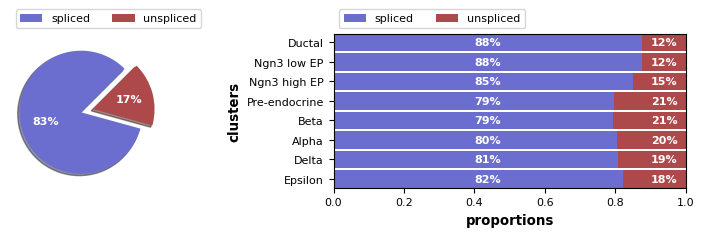

In [9]:
scv.pl.proportions(adata, groupby=clustering, save="velocity_proportion.pdf")

#### Embedding

computing velocity embedding
    finished (0:00:01) --> added
    'velocity_umap', embedded velocity vectors (adata.obsm)
saving figure to file ../figures/velocity/scvelo_velocity_embeding_stream.pdf


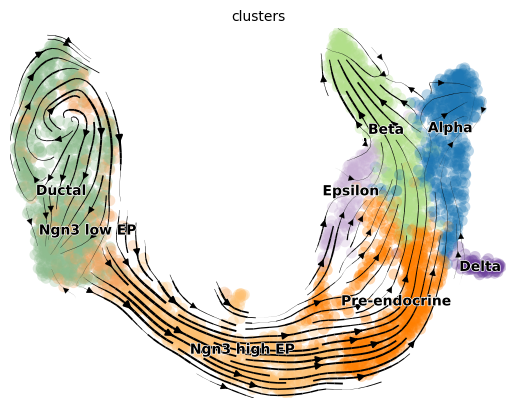

In [10]:
scv.pl.velocity_embedding_stream(adata, basis=embedding, color=clustering, save="velocity_embeding_stream.pdf")

saving figure to file ../figures/velocity/scvelo_velocity_embeding.pdf


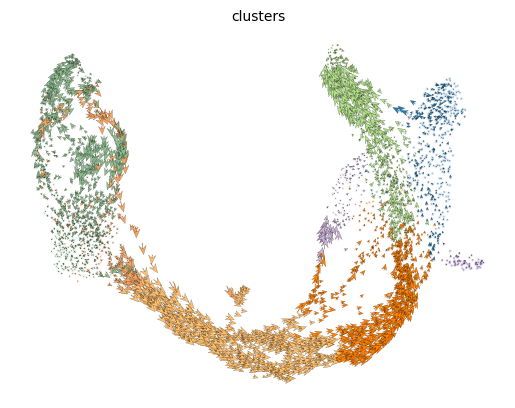

In [11]:
scv.pl.velocity_embedding(adata, color=clustering, arrow_length=3, arrow_size=3,  save="velocity_embeding.pdf")

#### Velocity length and confidence

saving figure to file ../figures/velocity/scvelo_velocity_confidence.pdf


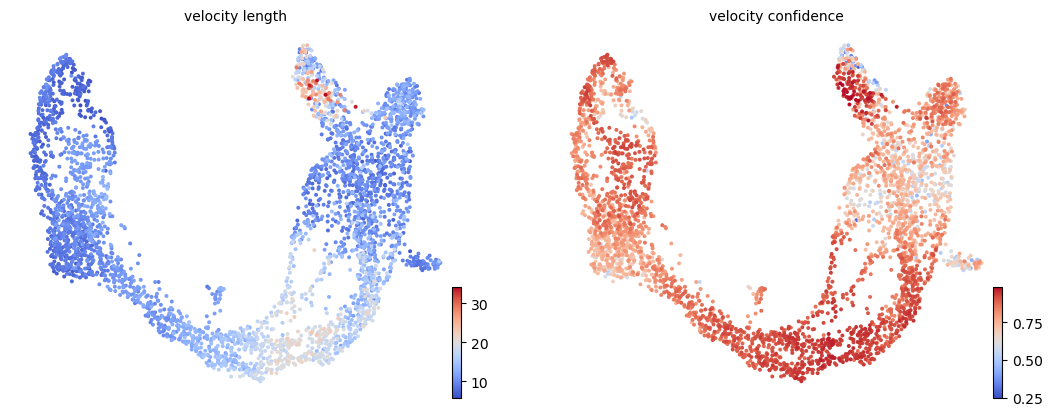

In [12]:
keys = 'velocity_length', 'velocity_confidence'
scv.pl.scatter(adata, c=keys, cmap='coolwarm', save="velocity_confidence.pdf")

## Velocity genes

In [13]:
scv.tl.rank_velocity_genes(adata, groupby=clustering, min_corr=.3)

ranking velocity genes


/mnt/workspace2/rwiegan/conda_envs/sctoolbox/lib/python3.10/site-packages/scvelo/tools/utils.py:463: DeprecationWarning: Please use `rankdata` from the `scipy.stats` namespace, the `scipy.stats.stats` namespace is deprecated.
  from scipy.stats.stats import rankdata


    finished (0:00:33) --> added 
    'rank_velocity_genes', sorted scores by group ids (adata.uns) 
    'spearmans_score', spearmans correlation scores (adata.var)


In [14]:
velocity_genes = pd.DataFrame(adata.uns['rank_velocity_genes']['names'])
velocity_genes.head()

Ductal Ngn3 low EP Ngn3 high EP Pre-endocrine     Beta    Alpha    Delta  \
0     Etl4       Glis3        Pde1c        Baiap3     Pax6  Zcchc16  Zcchc16   
1   Notch2        Etl4        Ptprs           Pam     Nnat    Nell1     Ank2   
2  Gm20649     Gm20649         Pclo          Sdk1    Ptprt   Prune2    Ptprt   
3     Rps3     Slc28a3     Rap1gap2          Gnas    Unc5c    Ndst4     Gbf1   
4     Sox5         Frk        Ttyh2         Abcc8  Tmem108    Kctd8   Snap25   

  Epsilon  
0   Tmcc3  
1  Gpr179  
2  Sorcs1  
3   Unc79  
4    Heg1

#### Gene of interest

In [15]:
if goi:
    scv.pl.velocity(adata, goi, ncols=2, save="velocity_goi.pdf")

saving figure to file ../figures/velocity/scvelo_marker_velocity_genes_Ductal.pdf


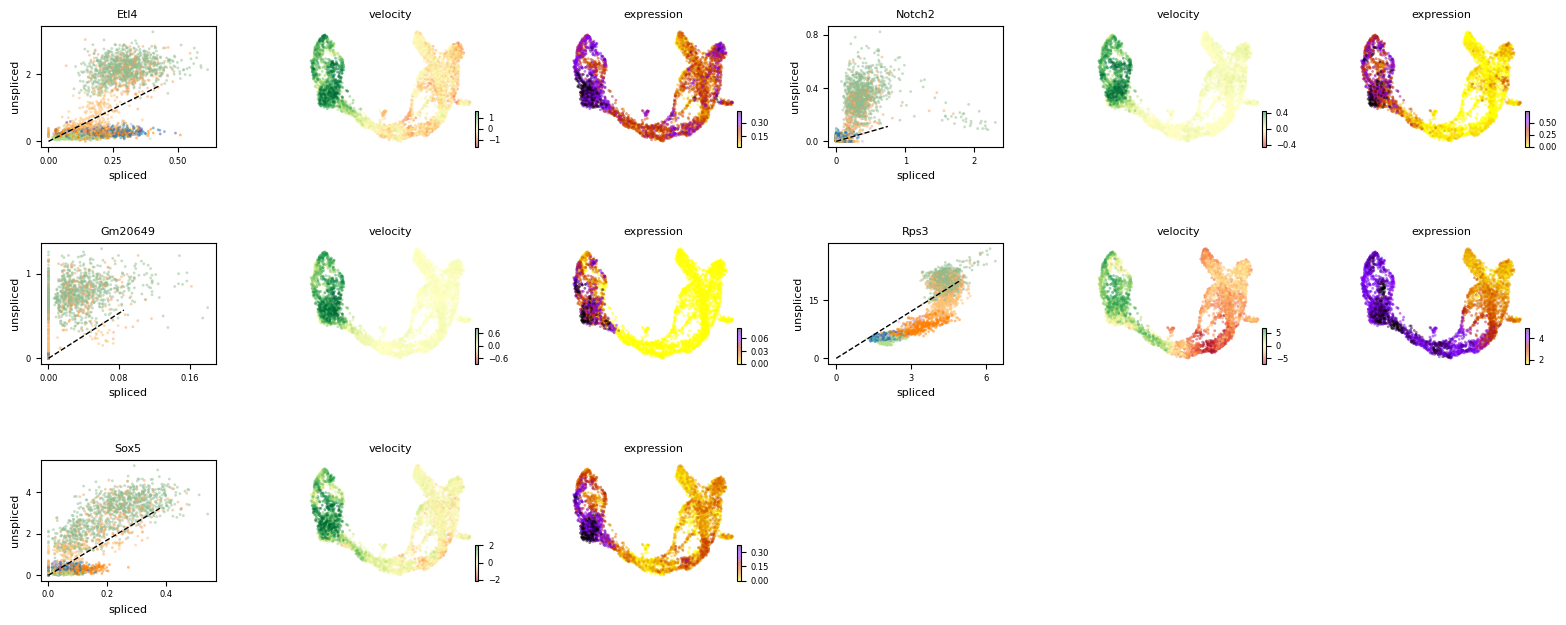

saving figure to file ../figures/velocity/scvelo_marker_velocity_genes_Ngn3 low EP.pdf


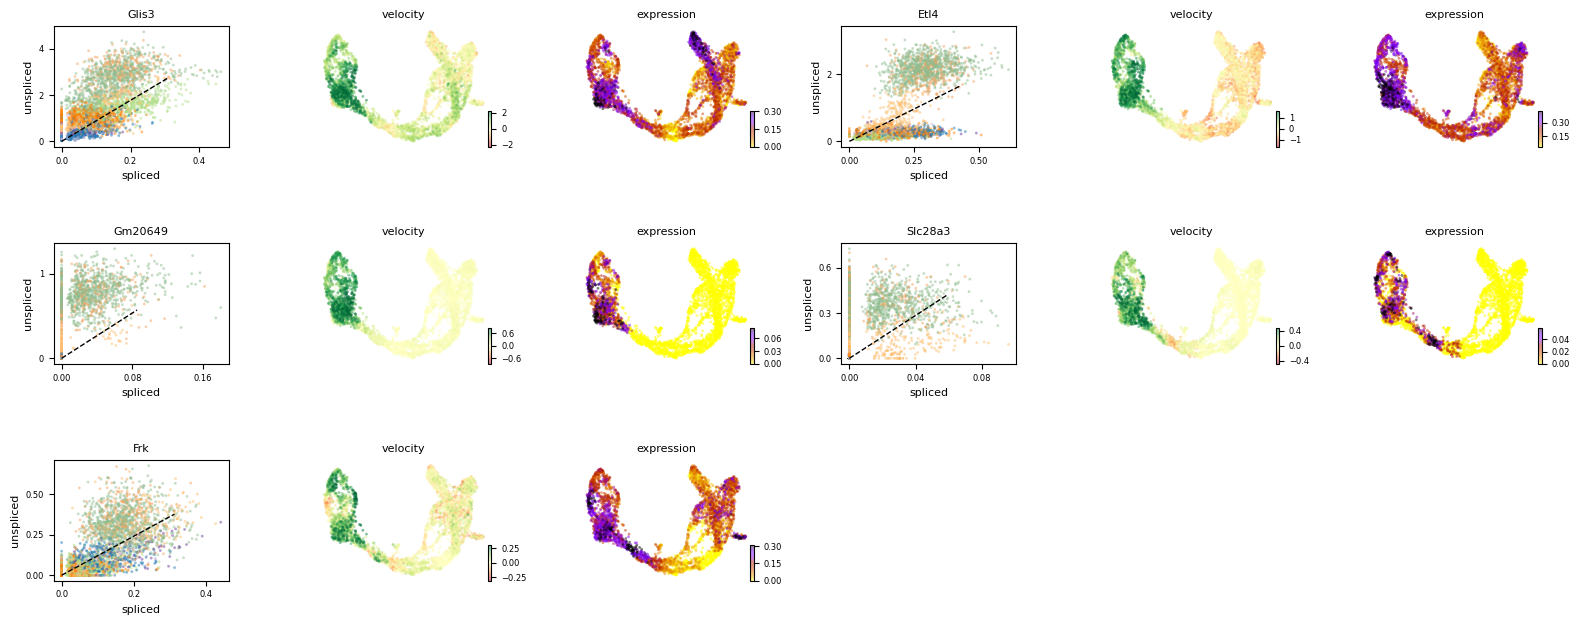

saving figure to file ../figures/velocity/scvelo_marker_velocity_genes_Ngn3 high EP.pdf


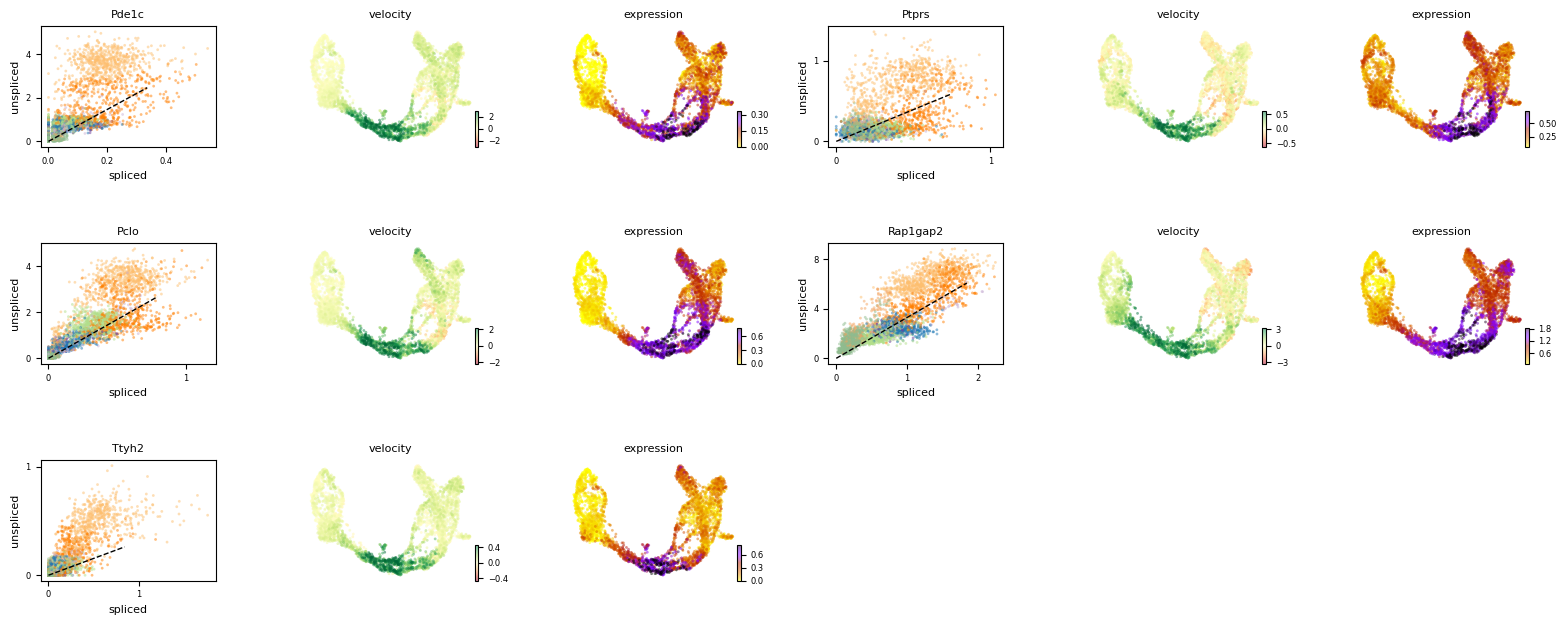

saving figure to file ../figures/velocity/scvelo_marker_velocity_genes_Pre-endocrine.pdf


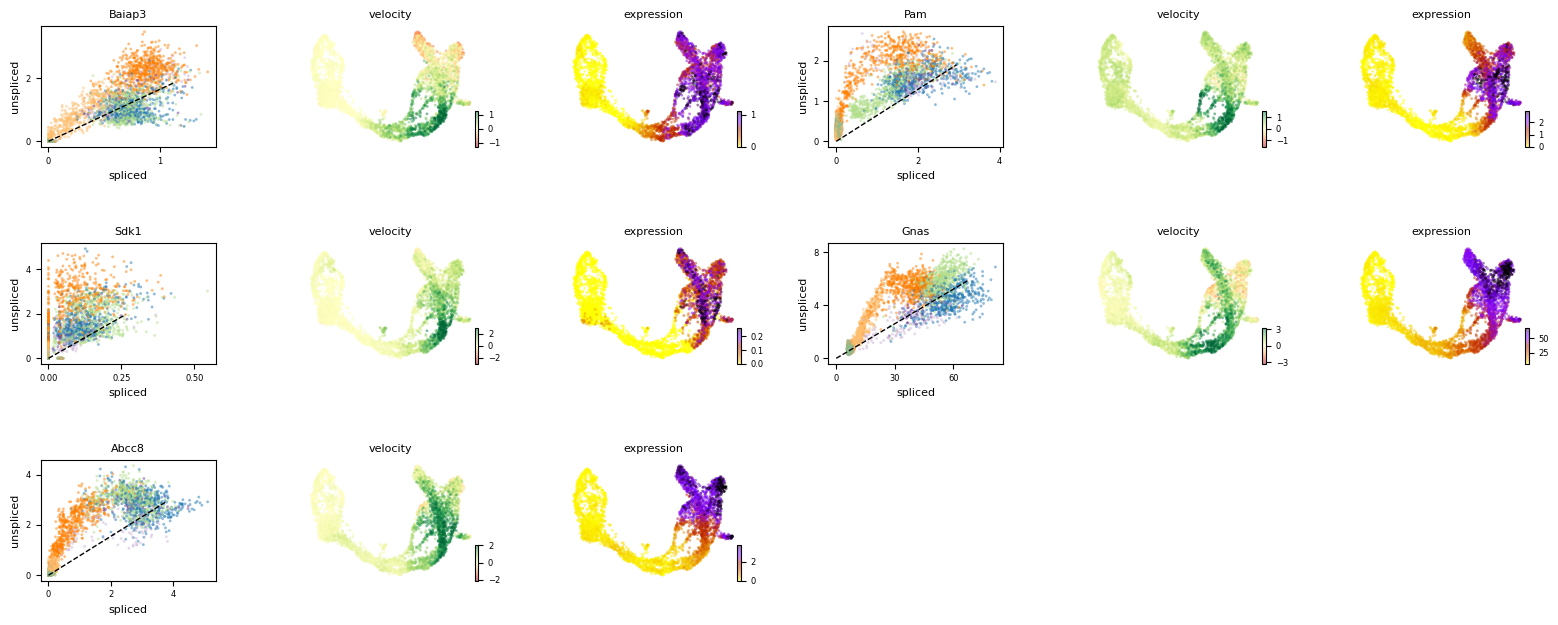

saving figure to file ../figures/velocity/scvelo_marker_velocity_genes_Beta.pdf


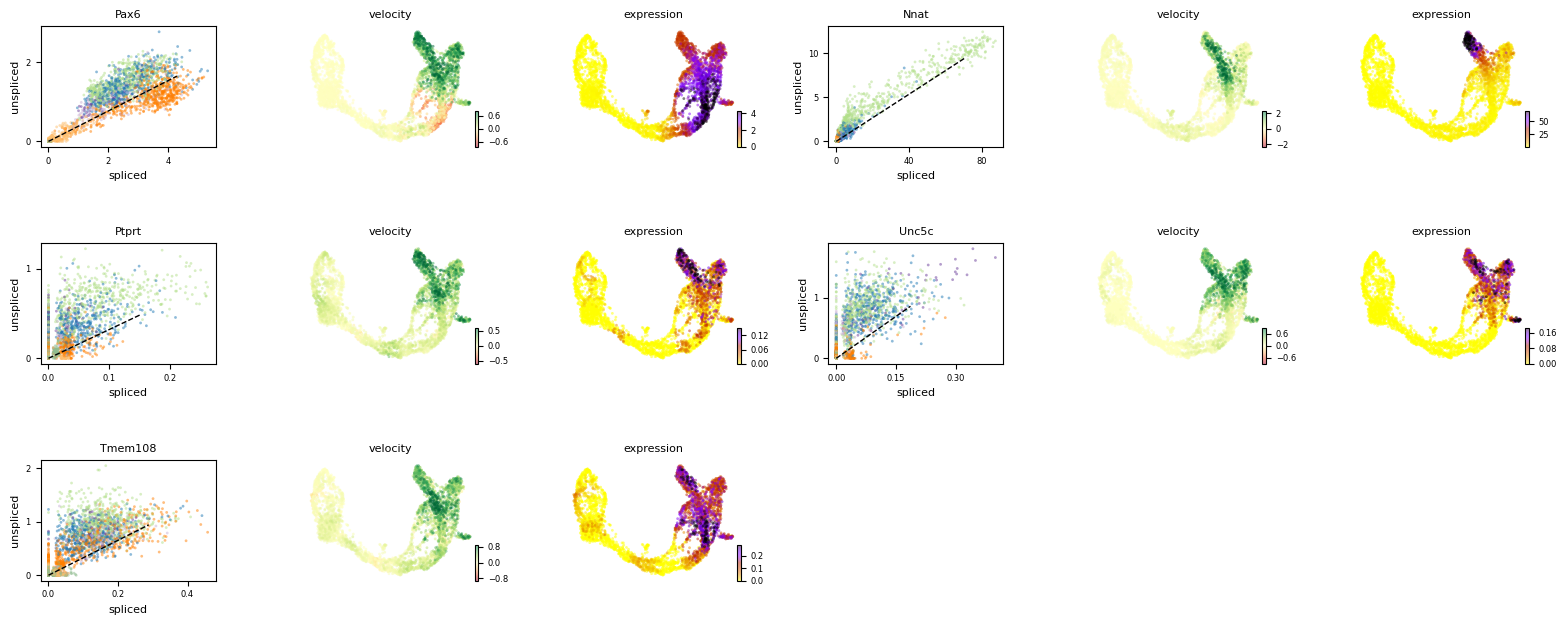

saving figure to file ../figures/velocity/scvelo_marker_velocity_genes_Alpha.pdf


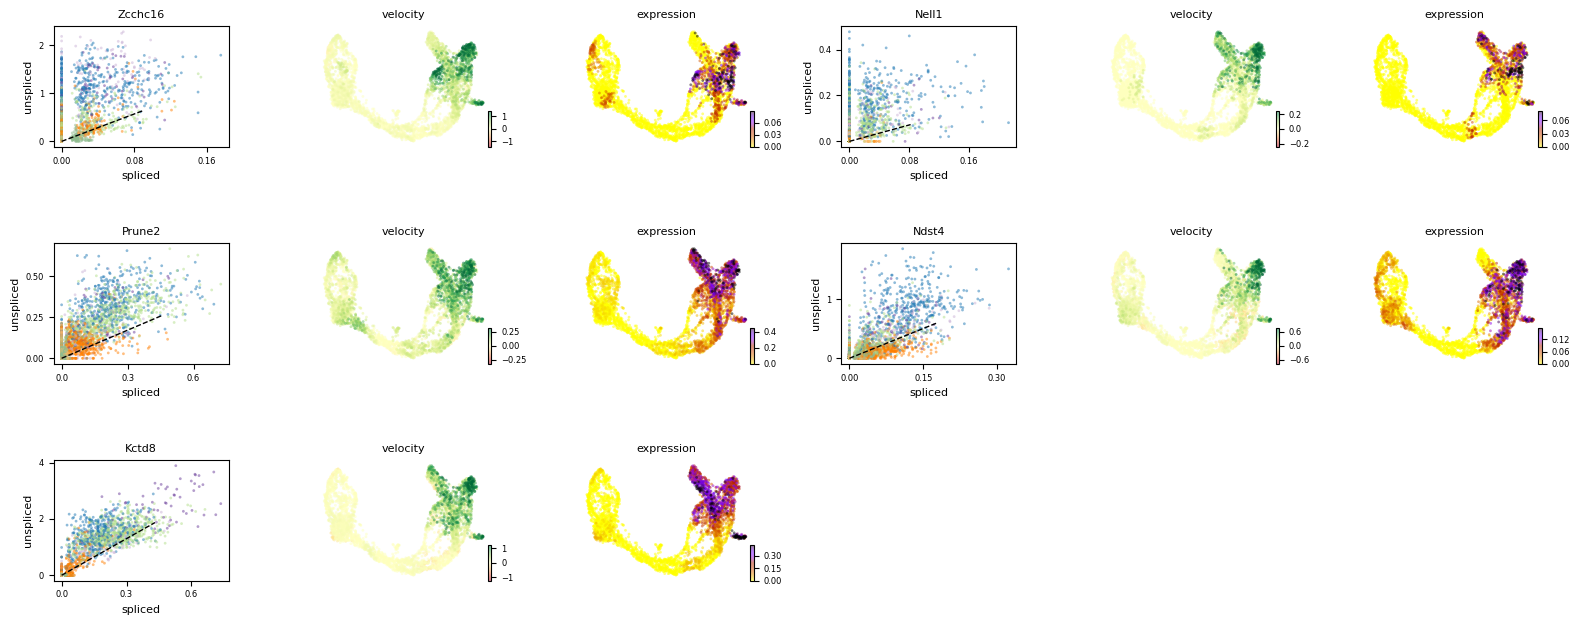

saving figure to file ../figures/velocity/scvelo_marker_velocity_genes_Delta.pdf


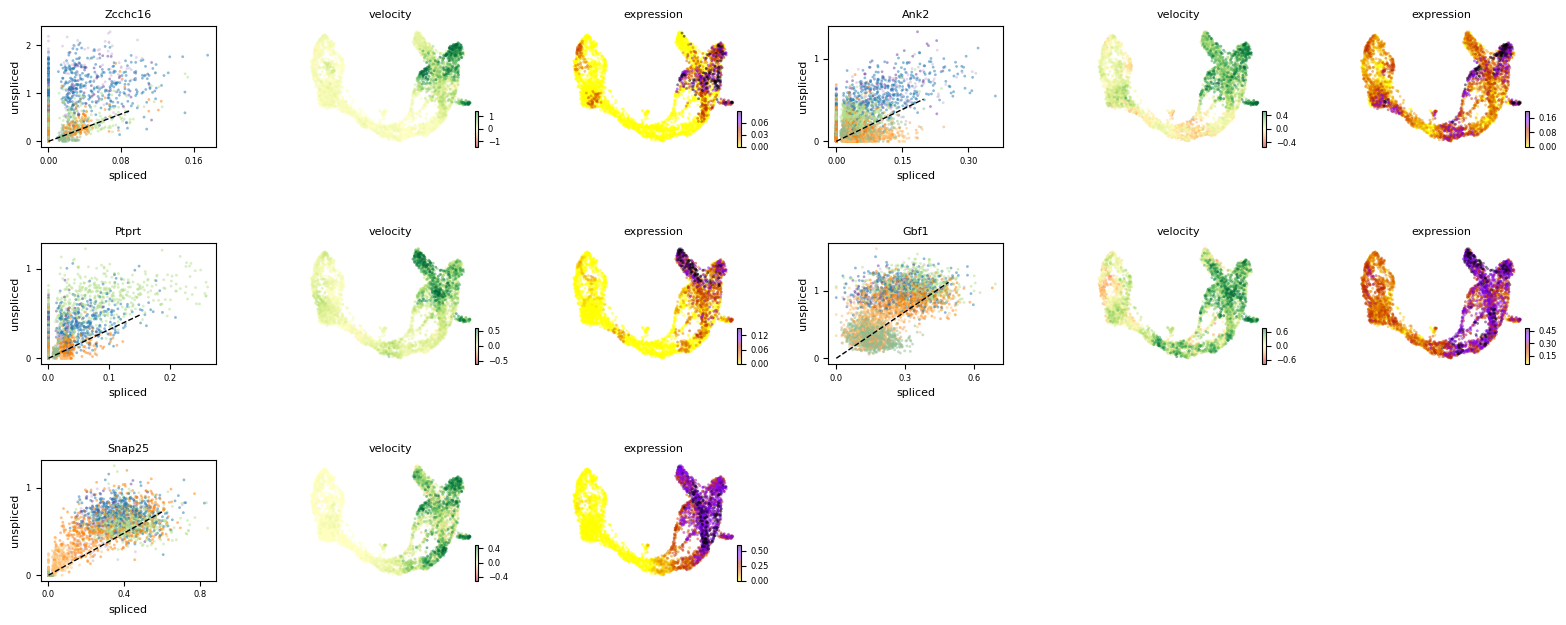

saving figure to file ../figures/velocity/scvelo_marker_velocity_genes_Epsilon.pdf


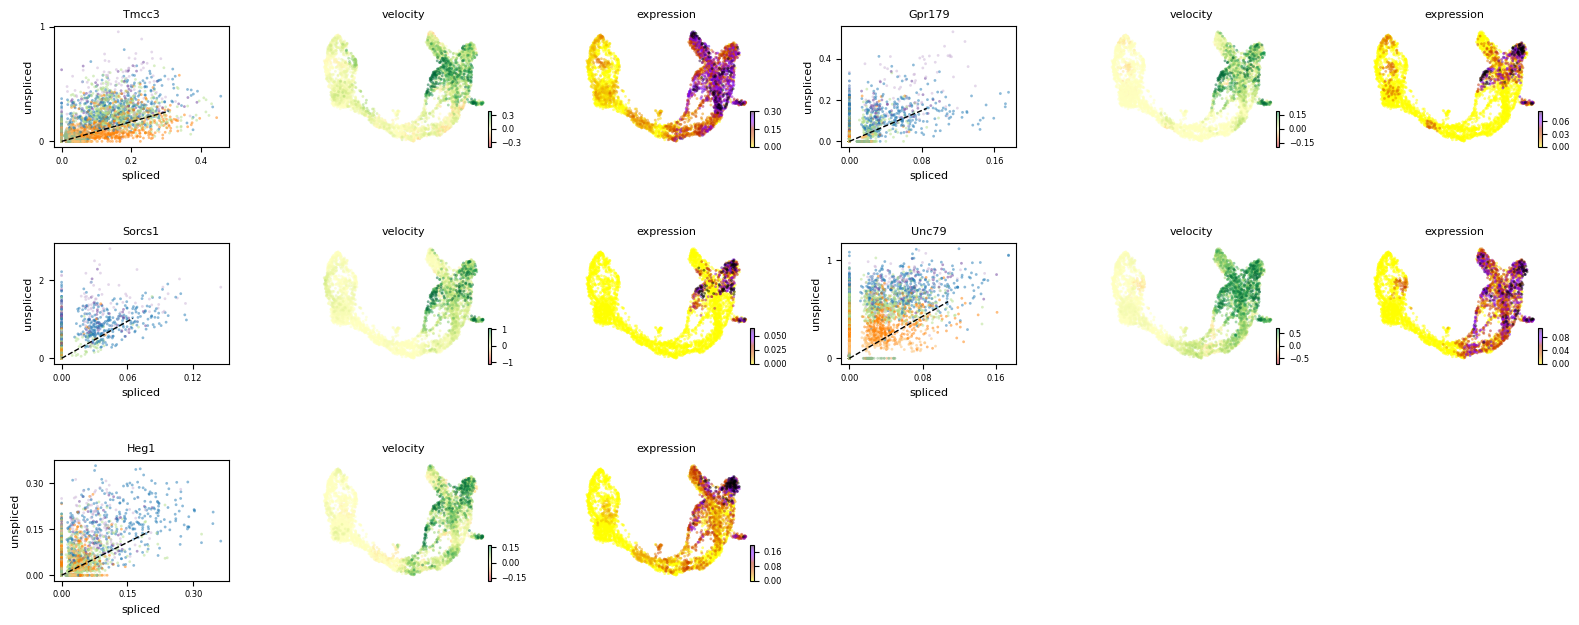

In [21]:
for col in velocity_genes.columns:
    genes = velocity_genes[col][:5]
    scv.pl.velocity(adata, genes, ncols=2, save=f"marker_velocity_genes_{col}.pdf")